# COGS 108 - Final Project (California -- the Fast Food Nation?)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Overview

<!-- *Fill in your overview here* -->

We observed which median household income in California had the most fast-food restaurants in their area by ZIP code. Using datasets we found on Kaggle, we found that the house price of `$250,000` had the highest frequency of fast-food restaurants in the area. In the major cities, the fast-food restaurants resided around middle-lower class areas. Residences that held a lower price in housing relative to others would hold a higher concentration of restaurants we considered fast-food. Additionally, we believe that upper-class areas would be able to afford expensive restaurants and lower-class areas may not have to same amount as funding. Thus, having more inexpensive restaurants or fast-food restaurants in the area.

# Names

- Nicholas Fisher
- Kelly Luu
- Isaiah Nicasio
- Destynee Tau

# Research Question

How did the housing median income in the 1990’s affect the concentration of fast food restaurants within California?

<a id='background'></a>

## Background & Prior Work

Fast food restaurants are the foundation of fast, convenient and inexpensive food. Due to the fast pace nature of society, fast food restaurants are popular amongst many college students. However, there is also a connection between fast food and lower income communities not only because of convenient, but also because of budget. In studies, there has been shown a connection between fast food and low-income neighborhoods which have been the lead for obesity [1]. However, fast food restaurants are popular in urban areas as well since urban areas have many restaurants and tourist attractions. 

In another study, researchers concluded that fast food restaurants were also closer to schools in large metropolitan areas that happened to also be considered low income. Due to the close proximity of fast foods, there were changes in the dietary practices of the students [2]. However, city layout is also a big factor of the fast food restaurant quantity. Locations that were considered urban typically held a larger amount of fast food places due to the higher population [3]. Population and socieconomic status are all factors to consider that may affect the popularity of fast food restaurants. 

With our project, we are interested in understanding if fast food restaurants build their restaurants in places of lower socio-economic status in order for the restaurant to get more profit. Since many fast food restaurants appeal to low income people, we were interested in finding a connection in the location of the establishment and the income of the houses values. 

References (include links):
- 1) https://www.sciencedirect.com/science/article/pii/S0749379704001394
- 2) https://www.sciencedirect.com/science/article/pii/S0091743508001084
- 3) https://www.sciencedirect.com/science/article/pii/S074937970700431X

# Hypothesis

<!-- *Fill in your hypotheses here* -->

Within areas in 1990 around California near our specified fast food chains; housing with lower income will hold a greater concentration of fast food restaurants.

# Dataset(s)

**Dataset Name:** Fast food restaurants across US

**Link:** [Fast Food Dataset](https://www.kaggle.com/khushishahh/fast-food-restaurants-across-us)

**Number of Observations:** `10000` observations and `11` attributes
<p>&nbsp;</p>

**Dataset Name:** California Housing Prices Data (5 new features!)

**Link:** [Housing Dataset](https://www.kaggle.com/fedesoriano/california-housing-prices-data-extra-features)

**Number of Observations:** `20640` observations and `14` attributes
<p>&nbsp;</p>

----
#### 1-2 sentences describing each dataset:
 #### Fast Food Restaurants Across US:
 > A list of fast-food restaurants that includes their information about location, more specifically their address, city, country,  latitude, longitude and province.

 #### California Housing Prices Data:
 > Our other dataset is the price for housing in California which gives the price, location, the number of rooms in the house.


 #### If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets:
 > With both of these CSV files we will compare and contrast the concentration of fast food places within higher and lower economic places. We will combine these two datasets through latitude and longitude.

# Setup

In [1]:
# Importing packages that will be implemented in the notebook
import geopy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from geopy.geocoders import Nominatim

# Data Cleaning

<!-- Describe your data cleaning steps here. -->

**Food Data Set:**
- Imported the data files and read them in using `Pandas`.
- Examined the shape of the dataset.
- Checked to see if the dataset contained `NAN` values.
- Dropped the `categories`, `country`, and `unamed: 0` columns since the data in
these columns isn't relevant to what we are analyzing.
- Filtered the dataset by `province` to show what is relevant for `CA`.
- Lowercase all the strings in each columns to make it easier to code. For example:
(city, address, name, province, website, and the names of the columns)
- Reset the index.
- Stripped each column to remove any white spaces.
- Changed `postal code` into all integer variables.
- Lastly, we viewed our dataset to make sure it is cleaned how we expect.

**Housing Data Set:**
- Imported the data files and read them in using `Pandas`.
- Examined the shape of the dataset.
- Checked to see if the dataset contained `NAN` values.
- Lowercase all the strings in each columns to make it easier to code.


## Food Dataset

In [2]:
# Reading in the CSV and storing as a DataFrame
foodData = pd.read_csv('https://raw.githubusercontent.com/kellyyluu/COGS108_Repo/main/Fast_Food_Restaurants_US%202.csv')

# Making all the columns lowercase and removing white spaces
foodData.columns = foodData.columns.str.strip().str.lower()
# Filter dataset for `CA` only
foodData = foodData[foodData['province'] == 'CA']
# Dropping the `country` and `categories` column
foodData.drop(['unnamed: 0','country', 'categories'], inplace = True, axis = 1, errors = 'ignore')

foodData

,address,city,latitude,longitude,name,postalcode,province,websites
7,4111 Oceanside Blvd,Oceanside,33.205722,-117.288645,Chipotle Mexican Grill,92056,CA,"http://www.chipotle.com,http://www.lasalsa.com"
14,1190 W Foothill Blvd,Azusa,34.133291,-117.924566,Carl's Jr,91702,CA,"http://www.carlsjr.com,http://www.carlsjr.com/"
17,6316 W 89th St,Los Angeles,33.955923,-118.396443,Togo's,90045,CA,http://www.togosspeedlunch.com/
70,2992 Jamacha Rd,El Cajon,32.739923,-116.942156,Burger King,92019,CA,"http://www.burgerking.com/,http://www.bk.com"
71,706 Fletcher Pkwy,El Cajon,32.808270,-116.971370,Boston Market,92020,CA,"http://www.bostonmarket.com,https://bostonmark..."
...,...,...,...,...,...,...,...,...
9983,11916 Aviation Blvd,Inglewood,33.924828,-118.378075,SUBWAY,90304,CA,http://www.subway.com
9990,814 N Ventura Rd,Port Hueneme,34.155100,-119.195200,Jack in the Box,93041,CA,http://www.jackinthebox.com
9991,401 W Channel Islands Blvd,Port Hueneme,34.176370,-119.208850,McDonald's,93041,CA,"http://mcdonalds.com,http://www.mcdonalds.com/..."
9992,351 E Channel Islands Blvd,Port Hueneme,34.176120,-119.195570,KFC,93041,CA,http://www.kfc.com


After visualizing the dataset filtered for `CA` we rename and remove some columns to make the dataset easier to analyze when we begin the comparison with our housing price dataset.

In [4]:
# Checking how many rows and columns our dataset has
foodData.shape

(1201, 8)

In [5]:
# Determining if there are any `null` values
foodData.isnull().values.any()

False

In [6]:
# Seeing what data types are in our dataset
foodData.dtypes

address        object
city           object
latitude      float64
longitude     float64
name           object
postalcode     object
province       object
websites       object
dtype: object

In [7]:
# Renaming `postalcode` in `foodData` to `zipcode`
foodData.rename(columns={'postalcode': 'zipcode'}, inplace = True)

# Dropping the index, `province`, `websites`
foodData = foodData.drop(columns = ['province', 'websites'])
foodData = foodData.reset_index(drop = True)
foodData

,address,city,latitude,longitude,name,zipcode
0,4111 Oceanside Blvd,Oceanside,33.205722,-117.288645,Chipotle Mexican Grill,92056
1,1190 W Foothill Blvd,Azusa,34.133291,-117.924566,Carl's Jr,91702
2,6316 W 89th St,Los Angeles,33.955923,-118.396443,Togo's,90045
3,2992 Jamacha Rd,El Cajon,32.739923,-116.942156,Burger King,92019
4,706 Fletcher Pkwy,El Cajon,32.808270,-116.971370,Boston Market,92020
...,...,...,...,...,...,...
1196,11916 Aviation Blvd,Inglewood,33.924828,-118.378075,SUBWAY,90304
1197,814 N Ventura Rd,Port Hueneme,34.155100,-119.195200,Jack in the Box,93041
1198,401 W Channel Islands Blvd,Port Hueneme,34.176370,-119.208850,McDonald's,93041
1199,351 E Channel Islands Blvd,Port Hueneme,34.176120,-119.195570,KFC,93041


## Housing Dataset

In [8]:
# Read in our CSV and store it as a DataFrame
houseData = pd.read_csv('https://raw.githubusercontent.com/kellyyluu/COGS108_Repo/main/California_Houses%202.csv')
# Lowercase all columns in the dataset
houseData.columns = houseData.columns.str.lower()
# Adjusting the value of `median_income`
houseData['median_income'] = 10000 * houseData['median_income']

houseData

,median_house_value,median_income,median_age,tot_rooms,tot_bedrooms,population,households,latitude,longitude,distance_to_coast,distance_to_la,distance_to_sandiego,distance_to_sanjose,distance_to_sanfrancisco
0,452600.0,83252.0,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,83014.0,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,72574.0,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,56431.0,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,38462.0,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,15603.0,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,25568.0,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,17000.0,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,18672.0,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [9]:
# Check how many rows and columns are in our dataset
houseData.shape

(20640, 14)

In [10]:
# Determine if there are any `null` values within the dataset
houseData.isnull().values.any()

False

# Data Analysis & Results (EDA)

To start our analysis, we examine the fast food dataset to check if there's any connection between `zipcode` and number of restaurants.
We use the `groupby` function to group `postalcode` and `zipcode`

In [11]:
postalCode = foodData.groupby('zipcode').count()
grouped = postalCode['address'].to_frame()
grouped

,address
zipcode,
90003,3
90006,2
90007,4
90008,2
90011,3
...,...
96001,1
96002,2
96080,2


After we found the distribution of postal codes and restaurants in the area, we then determined the mean and median were roughly `2`. Meaning, the distribution was fairly normal. Following this, we found there was an outlier of `9`. Using Google we determined the location Huntington Beach, which is fairly close to the coast. To continue, we attempt to determine which other variables might lead to the greater impact of restaurants in the area.

In [12]:
grouped.describe()

,address
count,589.000000
mean,2.039049
std,1.324868
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,9.000000


In [13]:
grouped[grouped.address == grouped.address.max()]

,address
zipcode,
92647,9


From this data we observe that there may be a connection between the distance from the coast and the number of restaurants. To check our beliefs a histogram was created comparing the distance from the coast. In addition, histograms were created for the remaining columns of the dataset to visually see if there exists any other outliers. Finally, a boxplot was created to visually check the average and outliers.

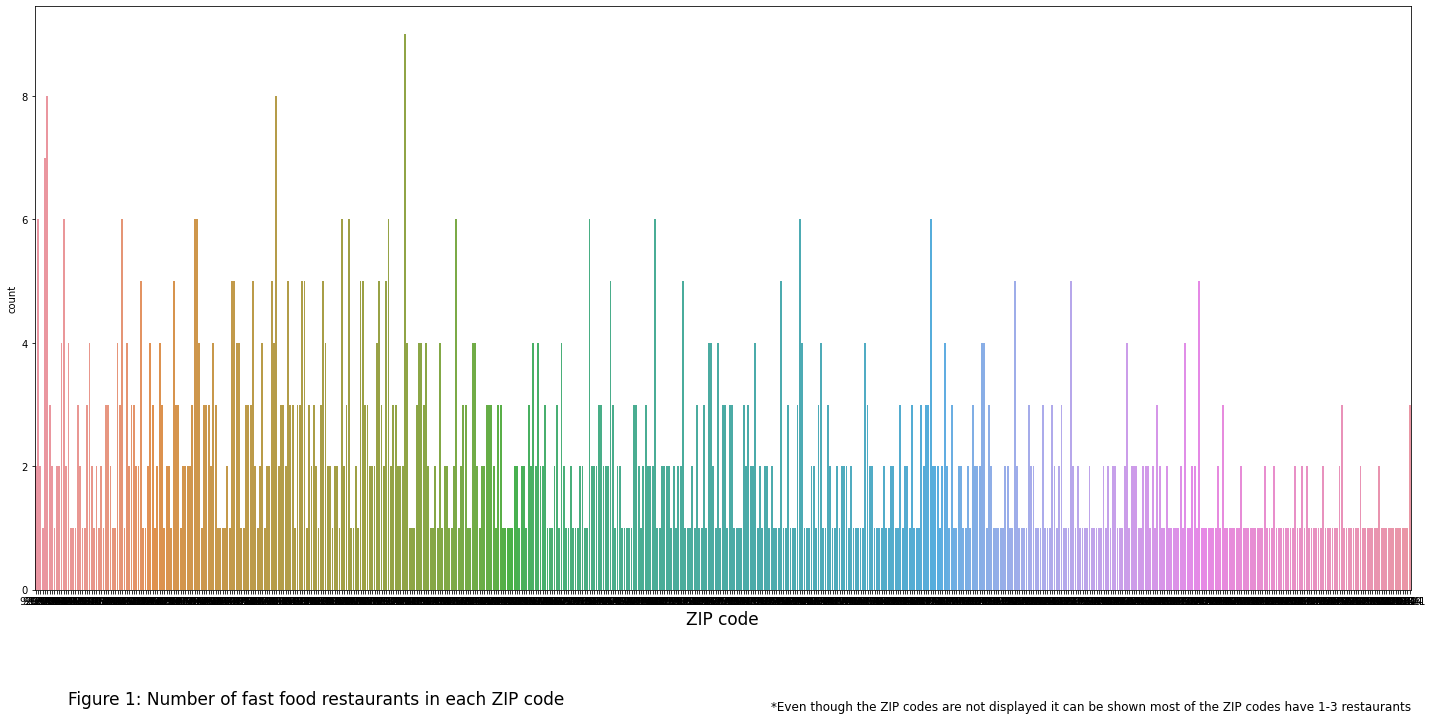

In [14]:
#Gives us a graphic of the  number of fast food restaurants in each ZIP Code
plt.figure(figsize=(20,10))
sns.countplot(x = foodData["zipcode"], data = grouped)
name = """Figure 1: Number of fast food restaurants in each ZIP code"""
plt.annotate('*Even though the ZIP codes are not displayed it can be shown most of the ZIP codes have 1-3 restaurants', xy = (1.0, -0.2), xycoords='axes fraction', ha='right', va="center", fontsize=12)
plt.xlabel("ZIP code", fontsize=17)
plt.figtext(0.05,0.01, name, fontsize=17, va="bottom", ha="left")
plt.tight_layout()

Here we can see there's a few ZIP codes that have 5 or more fast food restaurants and the ZIP code with the most the fast food restaurants in them has 9.

In [15]:
# Seeing how many fast food restaurants are located in Pacific Palisades
foodData[foodData.city == 'Pacific Palisades']

,address,city,latitude,longitude,name,zipcode
851,17346 W Sunset Blvd,Pacific Palisades,34.040049,-118.553612,Jack in the Box,90272


Histograms of Numerical Sets Within Housing Data


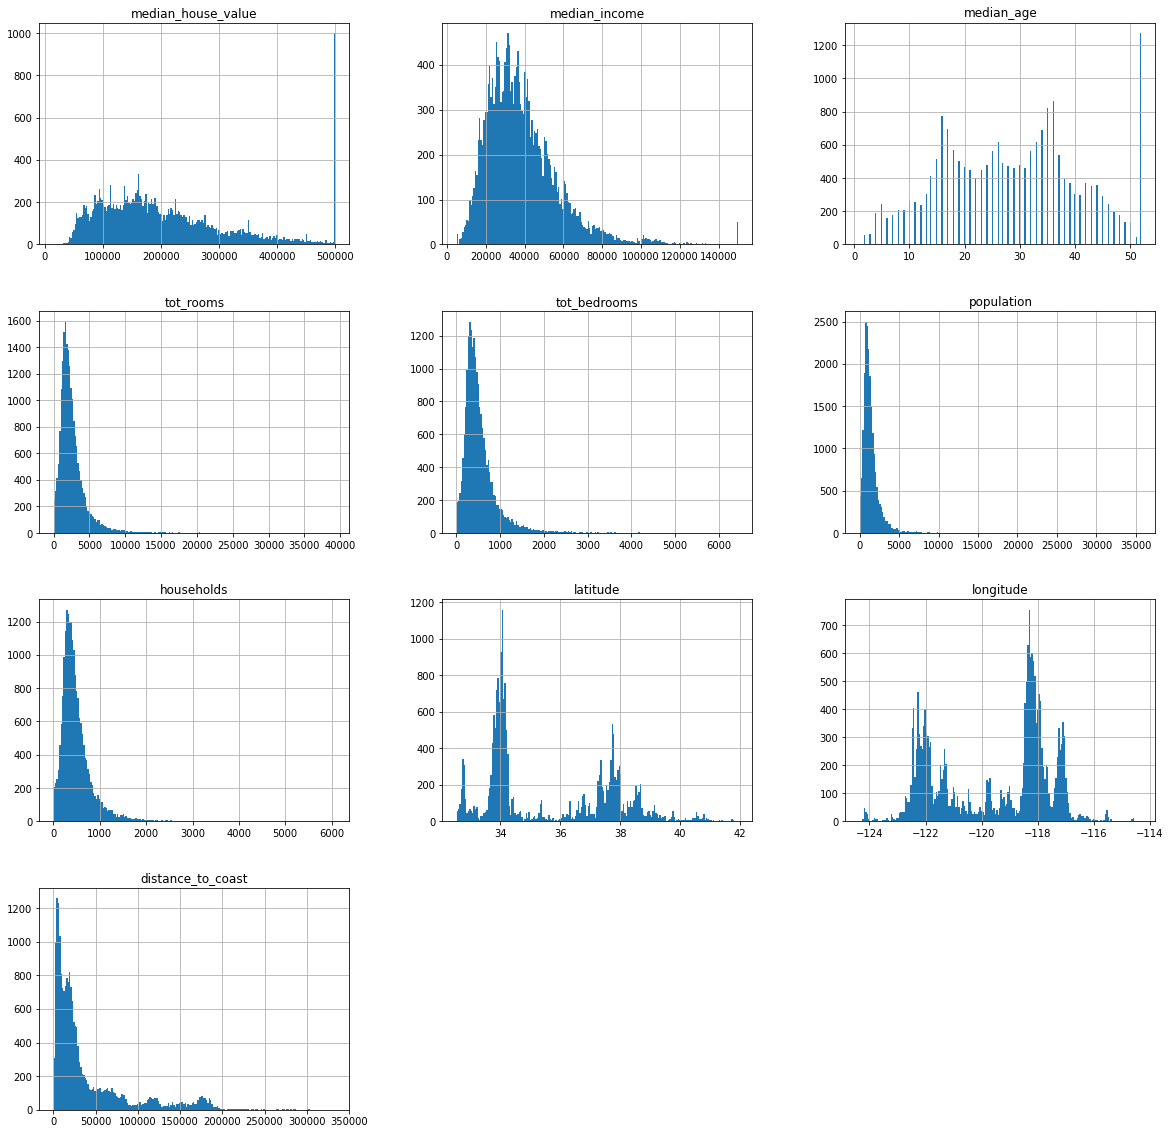

In [16]:
houseHist = houseData.drop(['distance_to_la', 'distance_to_sandiego', 'distance_to_sanjose', 'distance_to_sanfrancisco'], axis=1)
print('Histograms of Numerical Sets Within Housing Data')
houseHist.hist(bins=200, figsize=(20,20));

Boxplots Showing Mean of Various Sets of Interests In Housing Dataset


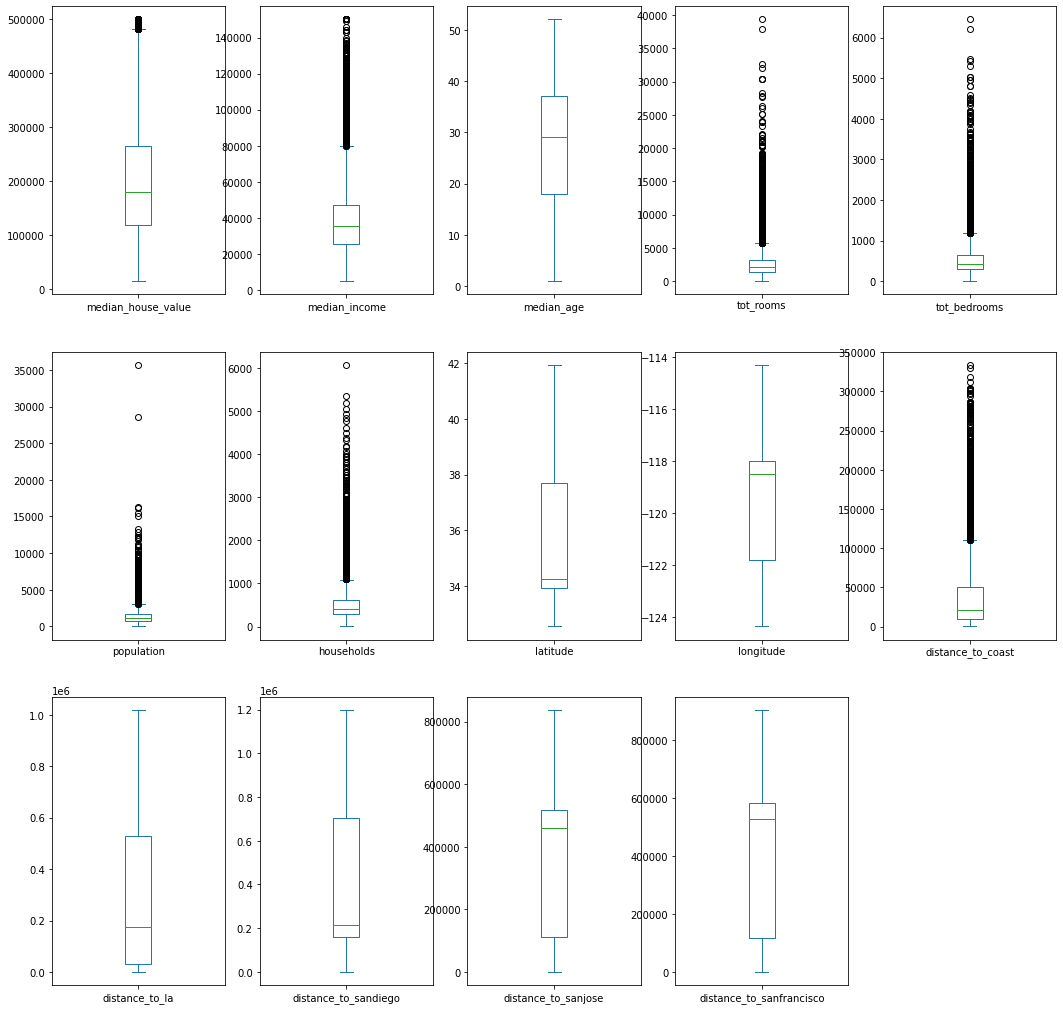

In [17]:
print('Boxplots Showing Mean of Various Sets of Interests In Housing Dataset')
houseData.plot(kind = "box" , subplots = True , figsize = (18,18), layout = (3,5));

From the boxplot we noticed most of the data for `households`, `tot_rooms`, and `tot_bedrooms` were skewed right with more outliers after the `75 percentile`. However, the distribution that is most normal was `median_house_value` and `median_age`.

Next, we predict and see the relationship that `median_income` has with the `median_house_value`. We can see that there is an effect size of about 4 that tells us a 1% change in `median_income` yields a 4% change in `median_house_value`. There is a 47 percent variance of `median_house_value` which tells us about half the variance in `median_house_value` is explained by `median_income`.

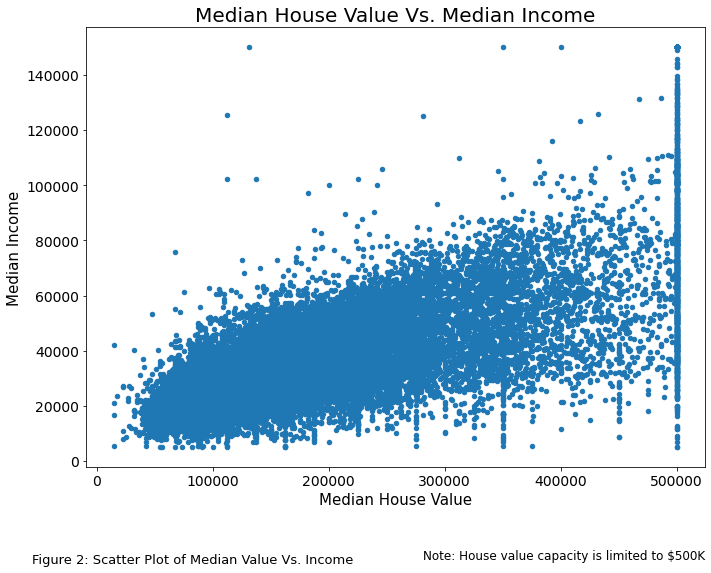

In [18]:
houseData.plot(kind = "scatter", x = 'median_house_value', y = 'median_income', figsize = (10, 8))
plt.xlabel("Median House Value", size = 15)
plt.ylabel("Median Income", size = 15)
plt.title("Median House Value Vs. Median Income", size = 20)

# Adding a footnote and graph name
plt.tick_params(labelsize = 14)
plt.annotate('Note: House value capacity is limited to $500K', xy = (1.0, -0.2), xycoords='axes fraction', ha='right', va="center", fontsize=12)
name = """Figure 2: Scatter Plot of Median Value Vs. Income"""
plt.figtext(0.05,0.01, name, fontsize=13, va="bottom", ha="left")
plt.tight_layout()

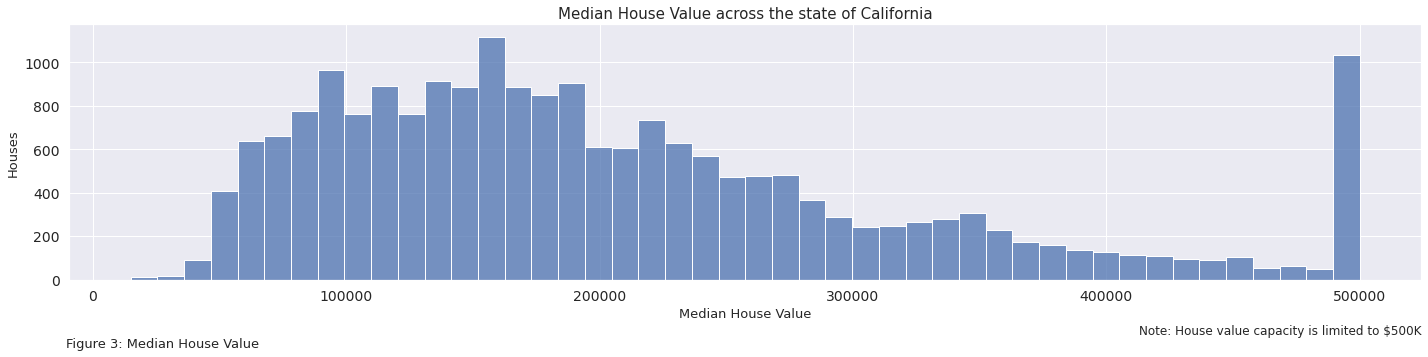

In [18]:
plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid")
sns.histplot(houseData['median_house_value'],color='b')
plt.title("Median House Value across the state of California", fontsize=15)
plt.xlabel("Median House Value", fontsize=13)
plt.ylabel("Houses", fontsize=13)

# Adding a footnote and graph name
plt.tick_params(labelsize = 14)
plt.annotate('Note: House value capacity is limited to $500K', xy = (1.0, -0.2), xycoords='axes fraction', ha='right', va="center", fontsize=12)
name = """Figure 3: Median House Value"""
plt.figtext(0.05,0.01, name, fontsize=13, va="bottom", ha="left")
plt.tight_layout()

Then, we found the population based on `latitude` and `longitude`. This allows us to see the concentration of the houses and where the more populated ares are located. Observing the graph, this shows Northern California has a higher concentration of houses. There also seems to be a sparse distribution inland and greater population towards the major urban cities.

After we overlapped the houses in California with fast food restaurants. Doing this let's us view the concentration of restaurants and households. From the graph we notice there is a higher concentration of restaurants where there are more houses listed. This distribution also shows sparse outliers with more restaurants inland. From this we can see that a relationship between restaurant locations and the concentration of houses does seem to exist.

Text(0.05, 0.06, 'Figure 4: Scatter plot of longitude/latitude of both datasets')

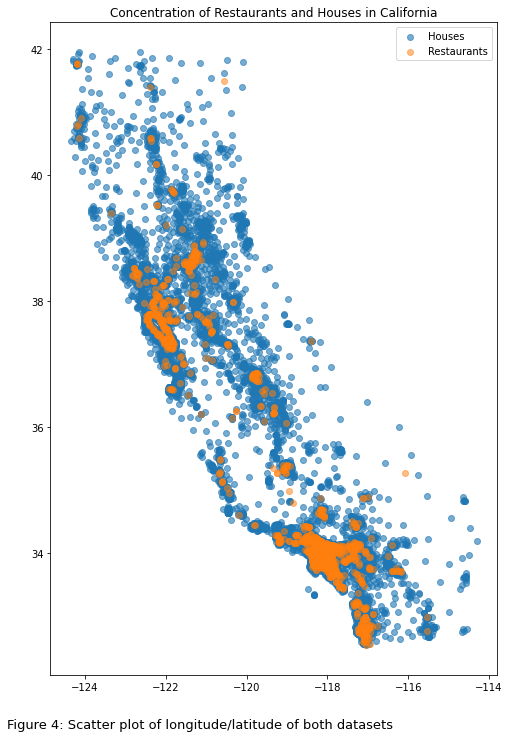

In [19]:
plt.figure(figsize = (8,12))
houses = plt.scatter(houseData["longitude"], houseData["latitude"], alpha = 0.6, cmap = 'viridis')
food = plt.scatter(foodData["longitude"], foodData["latitude"], alpha = 0.5, cmap = 'viridis')

plt.title("Concentration of Restaurants and Houses in California")
plt.legend(["Houses", "Restaurants"])
name = """Figure 4: Scatter plot of longitude/latitude of both datasets"""
plt.figtext(0.05,0.06, name, fontsize=13, va="bottom", ha="left")

To help determine our hypothesis the `geopy` package is used to get the ZIP codes of the dataset given the `latitude` and `longitude`. With this information we can then analyze and compare fast food locations against housing locations.
First, a function is created to find the ZIP code by checking `latitude` and `longitutde` in each row. This will return a new dataset that includes each corresponding `address` and `postcode`.

In [20]:
# Function to go through each row in `latitude` and `longitude` and
# get the zipcode using `geopy`
def get_zipcode(location):
    if location and location.raw.get('address') and location.raw['address'].get('postcode'):
        return location.raw['address']['postcode']
    else:
        return None

In [21]:
# Keep track of progress while dataset is uploading
# tqdm.pandas()
# Get access to the `geopy` API
# locate = geopy.Nominatim(user_agent = "check_1")

# Adding a `location` column to the dataset to store addresses found using `geopy`
# houseData['location'] = houseData.progress_apply(
#    lambda row: locate.reverse((row['latitude'], row['longitude'])), axis = 1)

# Calling the function `get_zipcode` on the dataset to get the ZIP codes and include them in `houseData`
# houseData['zipcode'] = houseData['location'].apply(get_zipcode)
# houseData

Due to the size of the dataset and time it takes for the function to complete, the new dataset created from the output above is saved as a `CSV` for quicker access and analysis. This will overwrite our existing `houseData` to include the updated information.

In [21]:
houseData = pd.read_csv('https://raw.githubusercontent.com/kellyyluu/COGS108_Repo/main/Housing_Update.csv')

# Remove variables in `zipcode` that contain `None`
houseData.drop(houseData.loc[houseData['zipcode'] == "None"].index, inplace = True)
houseData.dropna(how = 'all', inplace = True)
# Rename `location` to `address`
houseData.rename(columns = {'location': 'address'}, inplace = True)
# Removing parenthesis from `address` column
houseData.address = houseData.address.str.replace(r'[\(\)\d]+', '')
houseData

C:\Users\Fasil\AppData\Local\Temp/ipykernel_265964/276468524.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  houseData.address = houseData.address.str.replace(r'[\(\)\d]+', '')


,median_house_value,median_income,median_age,tot_rooms,tot_bedrooms,population,households,latitude,longitude,distance_to_coast,distance_to_la,distance_to_sandiego,distance_to_sanjose,distance_to_sanfrancisco,address,zipcode
0,452600.0,83252.0,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767,"Ecological Study Area, Upper Side Hill entranc...",94563
1,358500.0,83014.0,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400,"Grizzly Peak Open Space, Charing Cross Road, O...",94618
2,352100.0,72574.0,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450,"Grove Shafter Freeway, Upper Rockridge, Oaklan...",94618
3,341300.0,56431.0,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,", Florio Street, Rockridge, Oakland, Alameda C...",94705
4,342200.0,38462.0,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,", Florio Street, Rockridge, Oakland, Alameda C...",94705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20634,78100.0,15603.0,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417,"Garden Valley Road, Yuba County, California, ,...",95922
20635,77100.0,25568.0,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634,"La Porte Road, Woodleaf, Challenge, Yuba Count...",95925
20636,92300.0,17000.0,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232,"Indiana Ranch Road, Yuba County, California, ,...",95925
20637,84700.0,18672.0,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166,"Vierra Road, Yuba County, California, , United...",95972


Find which ZIP codes appear in both `houseData` and `foodData` and store this into a new DataFrame called `mergezip`. From this, we can find other relationships that are shared between the data.

In [22]:
# Number of common ZIP codes between the two datasets
# `True`: Common (10715)    `False`: Different (8926)
# houseData['zipcode'].isin(foodData['zipcode']).value_counts()

# Storing the new dataset and removing duplicate columns.
mergezip = pd.merge(houseData, foodData, on = ['zipcode'], how = 'inner')
column = [18,19]
mergezip.drop(mergezip.columns[column], axis = 1, inplace = True)

# Mean value of `median_house_value` from new dataset.
mean = mergezip['median_house_value'].mean()
# Median value of `median_house_value` from new dataset.
median = mergezip['median_house_value'].median()

print('Mean: ' + str(mean), 'Median: ' + str(median))
mergezip
# Get summary of statistics
# mergezip.describe()

Mean: 199995.46239960048 Median: 182500.0


,median_house_value,median_income,median_age,tot_rooms,tot_bedrooms,population,households,latitude_x,longitude_x,distance_to_coast,distance_to_la,distance_to_sandiego,distance_to_sanjose,distance_to_sanfrancisco,address_x,zipcode,address_y,city,name
0,137500.0,17348.0,43,1007,312,558,253,37.82,-122.27,4012.371429,553882.992396,732706.612585,63294.803145,15068.165949,"Grove Shafter Freeway, Hoover-Foster, Oakland,...",94612,29 Grand Ave,Oakland,Subway
1,112500.0,17750.0,40,946,375,700,352,37.82,-122.27,4012.371429,553882.992396,732706.612585,63294.803145,15068.165949,"Grove Shafter Freeway, Hoover-Foster, Oakland,...",94612,29 Grand Ave,Oakland,Subway
2,171900.0,9218.0,21,896,453,735,438,37.82,-122.27,4012.371429,553882.992396,732706.612585,63294.803145,15068.165949,"Grove Shafter Freeway, Hoover-Foster, Oakland,...",94612,29 Grand Ave,Oakland,Subway
3,93800.0,15045.0,43,1868,456,1061,407,37.82,-122.27,4012.371429,553882.992396,732706.612585,63294.803145,15068.165949,"Grove Shafter Freeway, Hoover-Foster, Oakland,...",94612,29 Grand Ave,Oakland,Subway
4,97500.0,11108.0,41,3221,853,1959,720,37.82,-122.27,4012.371429,553882.992396,732706.612585,63294.803145,15068.165949,"Grove Shafter Freeway, Hoover-Foster, Oakland,...",94612,29 Grand Ave,Oakland,Subway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24024,65000.0,23496.0,17,4251,899,3265,934,39.12,-121.54,115445.855968,635613.710849,813738.805319,200810.840261,168598.635350,"Linda, Yuba County, California, , United State...",95901,631 10th St,Marysville,Taco Bell
24025,72000.0,41250.0,37,102,17,29,14,39.12,-121.52,115571.026540,634790.425414,812870.191026,201086.459307,169407.425969,"Griffith Avenue, Linda, Yuba County, Californi...",95901,631 10th St,Marysville,Taco Bell
24026,92400.0,25952.0,19,2043,421,1018,390,39.10,-121.48,113689.043741,631195.320167,809215.658038,199495.235013,169130.106297,", Erle Road, Yuba County, California, , United...",95901,631 10th St,Marysville,Taco Bell
24027,107200.0,35179.0,15,2655,493,1200,432,39.33,-121.40,139933.692662,650731.247735,828133.395444,225910.101322,194879.139377,", Douglas Way, Yuba County, California, , Unit...",95901,631 10th St,Marysville,Taco Bell


Text(0.9, 0.01, 'Figure 6: 10 Most Frequent ZIP codes Shared Between Both Datasets')

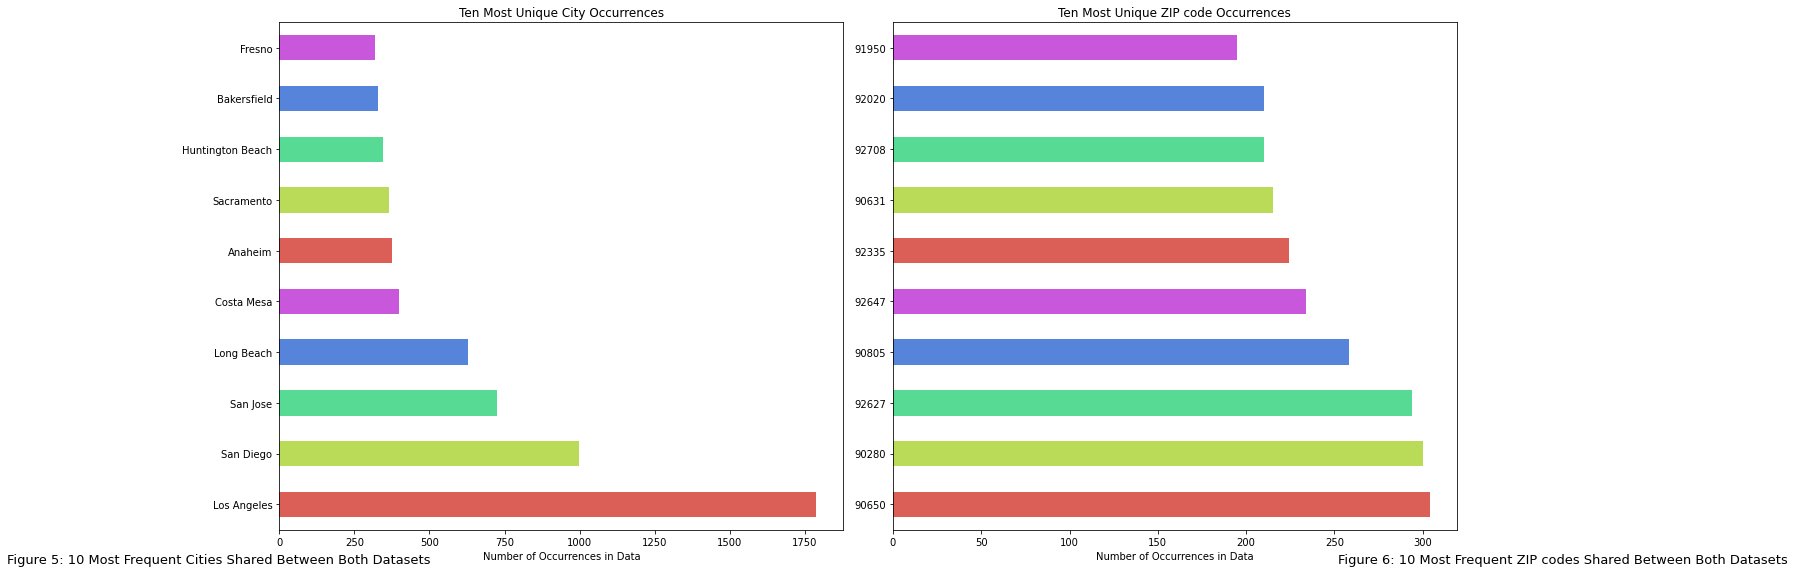

In [23]:
# Most frequent cities by number of shared occurrences between `houseData` and `foodData`
plt.rcParams['figure.figsize'] = 18,8
plt.subplot(1,2,1)
mergezip.city.value_counts().head(10).plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.xlabel("Number of Occurrences in Data")
plt.title("Ten Most Unique City Occurrences")
name = """Figure 5: 10 Most Frequent Cities Shared Between Both Datasets"""
plt.figtext(0.2,0.01, name, fontsize=13, va="bottom", ha="right")

plt.subplot(1,2,2)
mergezip.zipcode.value_counts().head(10).plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.xlabel("Number of Occurrences in Data")
plt.title("Ten Most Unique ZIP code Occurrences")
plt.tight_layout()
name = """Figure 6: 10 Most Frequent ZIP codes Shared Between Both Datasets"""
plt.figtext(0.9,0.01, name, fontsize=13, va="bottom", ha="left")

Ten Most Shared ZIP codes Between Food and Housing Dataset: ['90650', '90280', '92627', '90805', '92647', '92335', '90631', '92708', '92020', '91950']
Mean Median Income: zipcode
90003    16270.861111
90006    16620.000000
90007    17643.407407
90008    28631.142857
90011    17190.593220
             ...     
95988    21512.428571
96001    26363.722222
96002    25829.421053
96080    24626.312500
96094    15552.333333
Name: median_income, Length: 581, dtype: float64


Text(0.9, 0.01, 'Figure 8: Mean of 10 Least Frequent ZIP codes Shared Between Both Datasets')

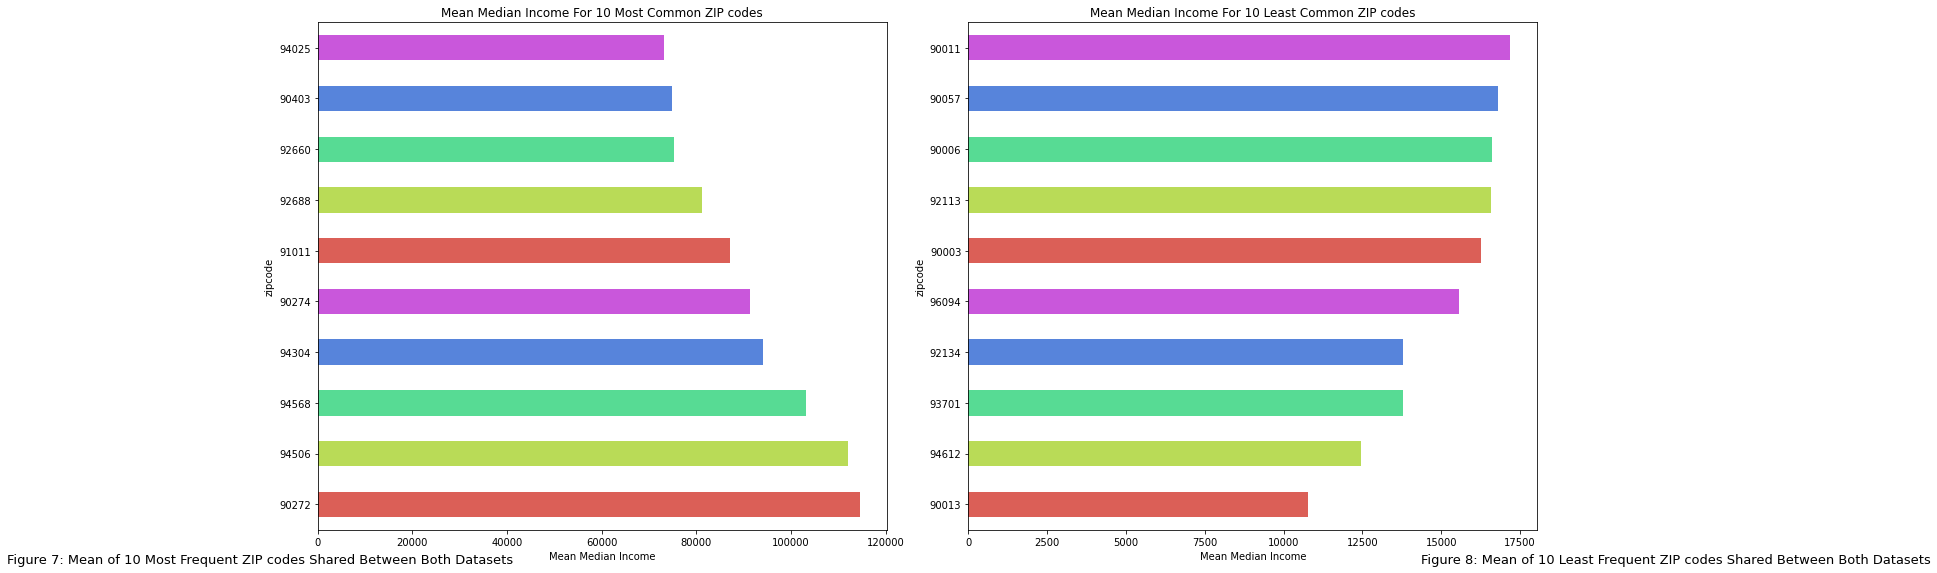

In [24]:
# Listing the ten most shared ZIP codes between `houseData` and `foodData`
popular_zip_list = mergezip.zipcode.value_counts().head(10).reset_index().get('index').tolist()
print("Ten Most Shared ZIP codes Between Food and Housing Dataset:",popular_zip_list)

# The mean median income for each ZIP code that is shared between `houseData` and `foodData`
mean_median_zip = mergezip.groupby('zipcode')['median_income'].mean()
print("Mean Median Income:", mean_median_zip)

# Graphing the top 10 most shared ZIP codes and their mean median income value between `houseData` and `foodData`
plt.rcParams['figure.figsize'] = 18,8
plt.subplot(1,2,1)
mean_median_zip.nlargest(10).plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.xlabel("Mean Median Income")
plt.title("Mean Median Income For 10 Most Common ZIP codes")
name = """Figure 7: Mean of 10 Most Frequent ZIP codes Shared Between Both Datasets"""
plt.figtext(0.2,0.01, name, fontsize=13, va="bottom", ha="right")

# Graphing the least 10 most shared ZIP codes and their mean median income value between `houseData` and `foodData`
plt.subplot(1,2,2)
mean_median_zip.nsmallest(10).plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.xlabel("Mean Median Income")
plt.title("Mean Median Income For 10 Least Common ZIP codes")
plt.tight_layout()
name = """Figure 8: Mean of 10 Least Frequent ZIP codes Shared Between Both Datasets"""
plt.figtext(0.9,0.01, name, fontsize=13, va="bottom", ha="left")

Mean Median Income: city
Agoura Hills      60724.200000
Alameda           36498.906250
Albany            59135.333333
Alhambra          31814.128205
Alpine            44424.833333
                      ...     
Winnetka          42483.555556
Woodland          26183.000000
Woodland Hills    60344.888889
Yucaipa           31275.769231
Yucca Valley      28416.666667
Name: median_income, Length: 332, dtype: float64


Text(0.9, 0.01, 'Figure 10: Median Income of 10 Least Frequent Cities Between Both Datasets')

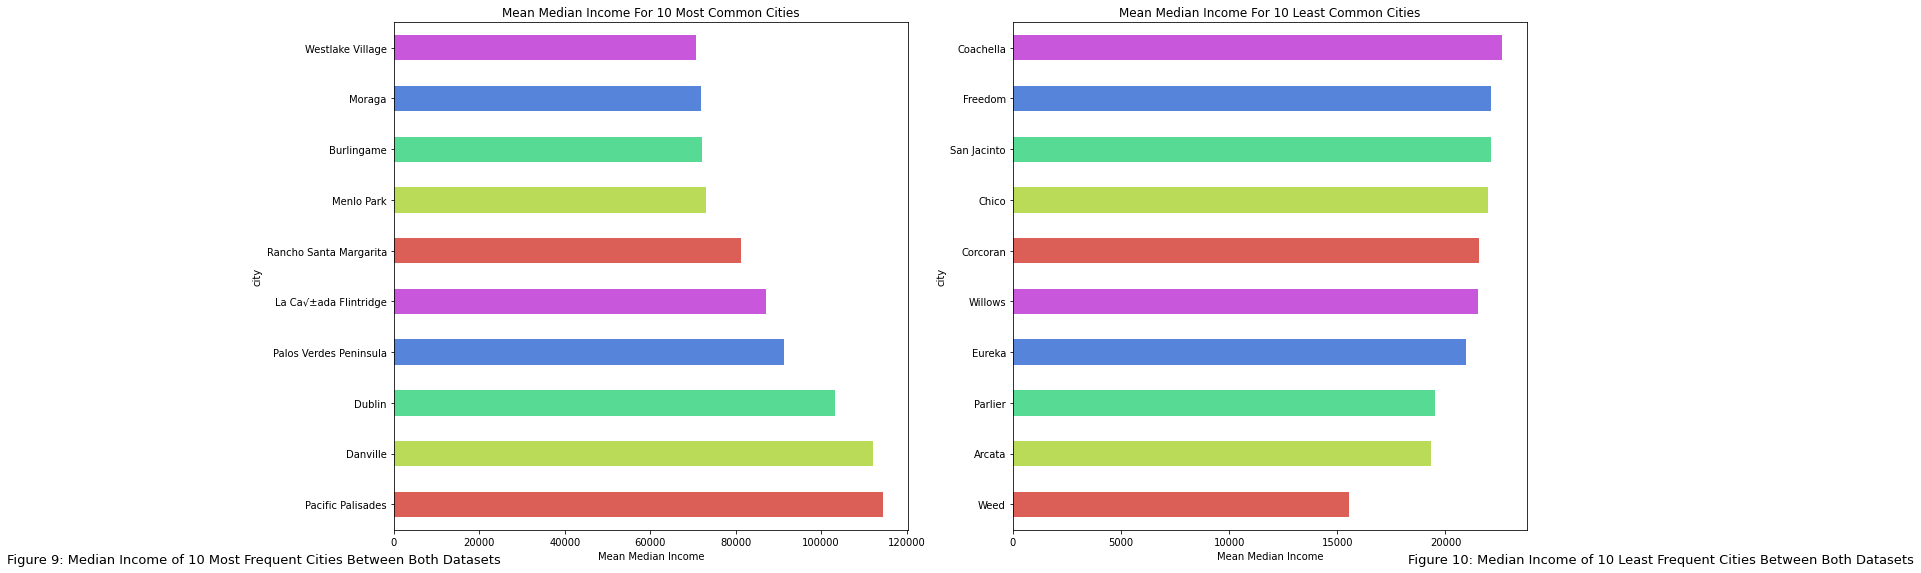

In [25]:
# The mean median income for each city that is shared between `houseData` and `foodData`
mean_median_city = mergezip.groupby('city')['median_income'].mean()
print("Mean Median Income:", mean_median_city)

# Graphing the top 10 most shared cities and their mean median income value between `houseData` and `foodData`
plt.rcParams['figure.figsize'] = 18,8
plt.subplot(1,2,1)
mean_median_city.nlargest(10).plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.xlabel("Mean Median Income")
plt.title("Mean Median Income For 10 Most Common Cities")
name = """Figure 9: Median Income of 10 Most Frequent Cities Between Both Datasets"""
plt.figtext(0.2,0.01, name, fontsize=13, va="bottom", ha="right")

# Graphing the top 10 least shared cities and their mean median income value between `houseData` and `foodData`
plt.subplot(1,2,2)
mean_median_city.nsmallest(10).plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.xlabel("Mean Median Income")
plt.title("Mean Median Income For 10 Least Common Cities")
plt.tight_layout()
name = """Figure 10: Median Income of 10 Least Frequent Cities Between Both Datasets"""
plt.figtext(0.9,0.01, name, fontsize=13, va="bottom", ha="left")

Text(1, 0.05, 'Figure 11: Median Income Across California')

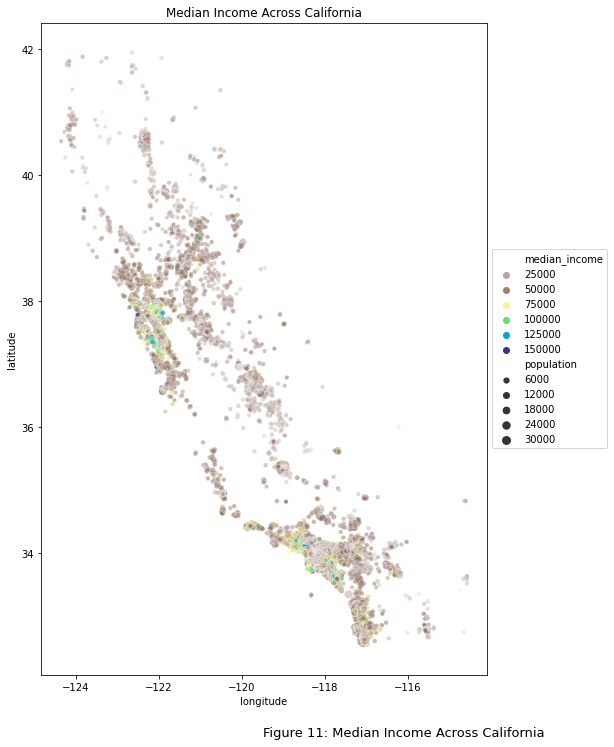

In [26]:
# Plotting median income with population as the density
plt.figure(figsize=(8,12))
pop_inc = sns.scatterplot(data= houseData, x = 'longitude', y = 'latitude',hue = 'median_income', size = 'population', alpha = 0.5, palette = 'terrain_r')
pop_inc.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title("Median Income Across California")
name = """Figure 11: Median Income Across California"""
plt.figtext(1,0.05, name, fontsize=13, va="bottom", ha="right")

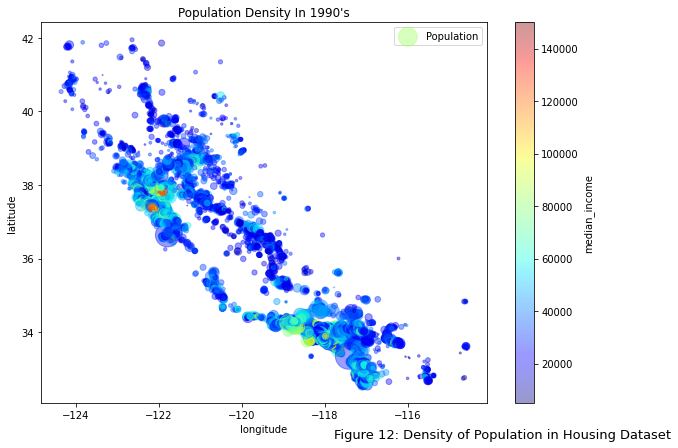

In [27]:
# Visualizing highest to lowest population areas within `houseData`
houseData.plot(kind= 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, s = houseData['population']/50, label = 'Population', figsize = (10,7), c = 'median_income', cmap = plt.get_cmap('jet'), colorbar = True, sharex = False)
plt.title("Population Density In 1990's")
name = """Figure 12: Density of Population in Housing Dataset"""
plt.figtext(1,0.05, name, fontsize=13, va="bottom", ha="right")
plt.legend()

Text(1, 0.05, 'Figure 13: Distribution of Median Income (Update)')

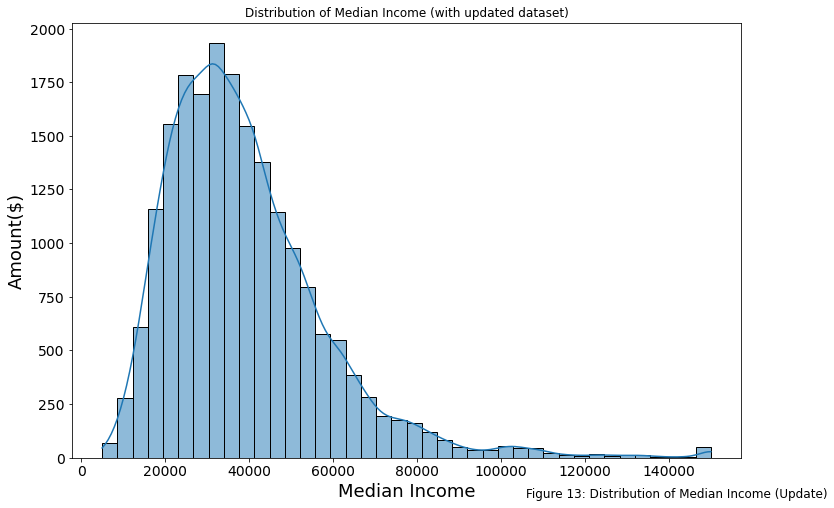

In [28]:
# Distribution of `median_income` using updated `houseData`
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# Plot frequency plot/histogram
income_hist = sns.histplot(x = 'median_income', kde = True, data = houseData, ax = axes, bins = 40);
change = axes.set(xlabel = 'Median Income', ylabel = 'Amount($)');
axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
axes.tick_params('y', labelsize = 14);
axes.tick_params('x', labelsize = 14);
plt.title("Distribution of Median Income (with updated dataset)")
name = """Figure 13: Distribution of Median Income (Update)"""
plt.figtext(1,0.05, name, fontsize=12, va="bottom", ha="right")

# Ethics & Privacy

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We believe that our data is underrepresented since it only has around 20,000 entries of house data and 10,000 entries of fast food data. We did more research into these data sets and although they are from reliable sources, we believe that they could only be samples of the actual data that is in the United States. Even though the house data set is divided up into blocks of houses, we still think they do not represent all the data because when we graphed the data, we noticed that there were gaps in the map that houses would still reside in. The sources that we got our data from is Kaggle. For the fast food dataset, it is sources from a data scientist which is not as reliable because there could be bias and under representation. Many fast food places could also not be classified as fast food because fast food is up for interpretation for people. We tried to find another dataset; however, we could not find another dataset that allows us the same information. We found datasets that had Los Angeles County restaurants; however, our analysis was more focused on fast food. We think that our research is not as reliable as we hoped it was because of our heavy reliance on a dataset that may not be reliable. In terms of our house dataset, this was pulled from a business and was cited in a paper previous. The information was pulled from a 1990's Census data and cleaned for its purpose on Kaggle. The housing prices has gone up since the release of these housing prices. Most of the houses have remained in the same position in buying power from this time. Although a few of the houses may have crashed or have significantly increased, it should not affect the distribution of fast food restaurants in where it is today. There may be some issues with the data set as it was cleaned by someone which could lead to bias and inaccuracy on the cleaning part. We also believe that this data was underrepresented as some of California seem to not have any houses in it although through a search on Zillow, we have found some houses in it. Also, we tried to find other datasets from more reliable sources such as Zillow; however, we ran into trouble as it did not provide us with median household income and median household value. Additionally, another issue that we encountered was combining our dataset. The only commonalities between our two datasets were the fact that they both had longitude and latitude. The house dataset did not have ZIP codes and we did not know how to analyze our data without a similar factor like ZIP code or city name. We handled this issue by finding a package that took in longitude and latitude and found the ZIP code. There could have been issues with this as it may create inaccurate ZIP codes, but we did not have enough time to check all the longitude and latitude and ZIP codes. We believe that we did our project on a sample of the data since both our datasets were inaccurate. We believe that our project could be more reliable if it had better datasets; however, with the datasets we had we tried to create the best analysis we could.


# Conclusion & Discussion

<!-- *Fill in your discussion information here* -->

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Our data refers to a 1990’s dataset which includes housing information such as median household income, population, median house value, and more. Additionally, we found a fast food dataset containing restaurant name, address, ZIP code, and more. We used these two datasets to start our analysis, then we mapped together the map of California with the median household income. We decided to set values for low, medium, and high income based off of our available dataset in order to create more consistency. Examining the data, we found where 25% of the data was and lower to determine low income which came to 35,769 to 49,999 dollars. After, we looked at where 25% to 75% of the data was placed for medium income and the rest was considered high income. To begin, we initially wanted to look at a single city to see what direction our analysis could start, and where we can extrapolate information from. We noticed the most frequently occurring zip code for restaurants was in Huntington Beach (92647) with 9 fast food restaurants. The houses in the area were close to our medium income - median house value price range. With this information, we wanted to extrapolate and look at California. We graphed the median household income and the fast food restaurant locations. With this, we were able to visually see our issues with the dataset as it did not have much data in certain areas of California. Using the two datasets we can then find a relationship between population and the concentration of fast food restaurants. Visualizing this, we can see that higher population correlates with higher concentration of fast food restaurants. To explore this further, bar graphs of the cities were created that contained the highest income which came to be Pacific Palisades which had one restaurant. We saw that this supports our initial hypothesis since there are not many restaurants in the area and they were considered high income. We looked at several cities with low income after we made the bar graph and saw that there are more fast food restaurants compared to the higher income areas. Through our analysis, we were able to conclude that fast food restaurants are highly concentrated in areas of higher population density and of lower median income value.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The datasets used within our research project were not flawless whatsoever. Working through our datasets we ran into numerous problems. The first problem being the lack of connections between the two datasets. Initially, we started the project knowing what two topics we wanted to compare, that being housing_median_income and fast_food_restaurants. We wanted to compare locations within each dataset. However, the housing dataset did not provide ZIP codes. To deal with this issue we used the latitude and longitude given and we used the geopy package to code a ZIP code finder. With the ZIP code now in the housing_median_income data we were able to pinpoint specific locations and add bar graphs with them. The second problem we ran into is determining how much area a block covers within our dataset. Within the Kaggle housing dataset, the descriptions given by the author were often by a block and no specific explanation for a block. For example, the population column description stated: "Total number of people residing within a block." With this information we were unsure as to how much area or distance resided within the block stated in the dataset. We could not determine the number of population within a specific measurement, so we assumed that a block contained a general about 250 x 250 feet to 500 x 500 feet. The last problem we ran into is the under-representation of data. Within our graphs we noticed that our housing data would max out at 500,000 for the house value. Meaning, every value in the housing dataset that would contain a higher house value than 500,000 would be represented as 500,000. Our data also contained an under-representation of population since our population only counted people who were living in a house. Any person who would be considered homeless could still visit restaurants and not be counted towards the population in the area within California. Although our analysis has its flaws, this has the potential for us to search for more information about how the median housing market income is affected. Giving us ways to understand what buildings are successful and thrive and to what areas they would thrive best in. With the expanse of Python packages we can find out more about the infrastructure within the city.


# Team Contributions

<!-- *Specify who in your group worked on which parts of the project.* -->

1. Nicholas Fisher:
    - Conclusion & Discussion
    - Mapping data (`Figure 1,4`)
    - Data analysis
    - Proofreading/edits
    - Worked on powerpoint
    - Graphic in food dataset
    - Overview
    
    
2. Kelly Luu:
    - Data analysis
    - Data cleaning
    - Data visuals (Bargraphs)
    - Video audio presenter 
    - Wrote out ethics and background
    - Proofreading
    - Overview
    - Conclusion & Discussion
    

3. Isiah Nicasio:
    - Data analysis
    - Presenter 
    - Proofreading and editing of paragraphs
    - Edited video
    - Overview
    - Conclusion & Discussion
    
    
4. Destynee Tau:
    - Data cleaning
    - Extracting and combining data
    - Data analysis
    - Data visuals (Mapping, bargraphs, labels, etc.)
    - Data manipulation
    - `README.md`
    - Proofreading and editing sections